# Tests de permutation de Fisher
# 20 juillet 2021
# @author : jeremylhour

In [1]:
rm(list=ls())

packageList = c('MASS', 'ggplot2', 'gridExtra')
#for(pack in packageList) install.packages(pack)
lapply(packageList, require, character.only = TRUE)

Le chargement a n'ecessit'e le package : MASS

Le chargement a n'ecessit'e le package : ggplot2

Le chargement a n'ecessit'e le package : gridExtra



[[1]]
[1] TRUE

[[2]]
[1] TRUE

[[3]]
[1] TRUE

In [2]:
# DEFINING FUNCTIONS

theta.iter = function(D, Y, Dstar, C=0){
    #' Calcule l'ATE
    
    #' @param D (vector): assignation observée au traitement
    #' @param Y (vector): vecteur des résultats
    #' @param Dstar (vector): nouvelle assignation au traitement
    #' @param C (double): constante dans l'hypothèse de test
    
    ChangeTreat = (Dstar!=D) # identifie ceux qui ont changé de statut
    # Si pas de changement de statut, Ystar = Y
    Ystar = Y 
    # En revanche, si changement de statut alors les anciens traités se retrouvent avec Y-C, et les anciens non-traités avec Y+C
    Ystar[ChangeTreat] = Y[ChangeTreat] + (1 - 2*D[ChangeTreat])*C
    return(mean(Ystar[Dstar==1]) - mean(Ystar[Dstar==0]))
}

compute.pval = function(theta.obs, theta.sim, C=0){
    #' Calcule la p-value 
    B = length(theta.sim) 
    return((1 + sum(abs(theta.sim-C)>abs(theta.obs-C)))/(B+1))
}

In [3]:
# PARAMETERS

set.seed(12071990)

# param
N = 200   # Nb. observations
pi = .2   # Probabilité d'être traité
B = 10000   # Nb. de permutations pour le test

C.val = seq(-3, 3, .1) # Valeurs à tester pour le calcul de l'intervalle de confiance

print(paste0("Number of observations : ", N))
print(paste0("Treatment probability : ", pi))
print(paste0("Number of permutations : ", B))

[1] "Number of observations : 200"
[1] "Treatment probability : 0.2"
[1] "Number of permutations : 10000"


In [4]:
print(paste(rep("=", 80), collapse=""))
print("CASE 1 : THERE IS AN EFFECT")
print(paste(rep("=", 80), collapse=""))

mu = 0.75 # effet du traitement

d = ifelse(runif(N) < pi, 1, 0)
y = d*mu + rnorm(N)

theta.hat = mean(y[d==1]) - mean(y[d==0])
print(paste0("Estimated effect : ", round(theta.hat, 3))) # Theta


Dpermut = replicate(B, sample(d)) # each column is a random permutation of d

theta.reshuffled = mapply(function(b) theta.iter(d,y,Dpermut[,b],C=0), b=1:B)
p.val1 = compute.pval(theta.hat,theta.reshuffled,C=0)
print(paste0("p-value : ", round(p.val1,3)))

titer = data.frame(val=theta.reshuffled)
p1 = ggplot(titer, aes(x=val)) + 
  geom_histogram(binwidth = .01, alpha=.5, position='identity',fill="steelblue", aes(y = ..density..)) +
  scale_x_continuous(name="estimated ATE") +
  ggtitle(expression(tau*"=.75")) + 
  geom_vline(xintercept = theta.hat, colour="darkorchid3", size=1) +
  theme(plot.title = element_text(lineheight=.8, face="bold"),legend.position="none")

p1_bw = ggplot(titer, aes(x=val)) + 
  geom_histogram(binwidth = .01, alpha=1, position='identity',fill="grey", aes(y = ..density..)) +
  scale_x_continuous(name="estimated effect") +
  ggtitle(expression(tau*"=.75")) + 
  geom_vline(xintercept = theta.hat, colour="black", size=1, linetype = "dashed") +
  theme(
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.background = element_blank(),
    plot.title = element_text(lineheight=.8, face="bold"),
    legend.position="none",
    axis.text=element_text(size=12)
    )

p.vals1 = vector(length=length(C.val))
for(i in 1:length(C.val)){
  theta.sim = mapply(function(b) theta.iter(d,y,Dpermut[,b],C=C.val[i]), b=1:B)
  p.vals1[i] = compute.pval(theta.hat,theta.sim,C=C.val[i])
}

[1] "================================================================================"
[1] "CASE 1 : THERE IS AN EFFECT"
[1] "================================================================================"
[1] "Estimated effect : 0.671"
[1] "p-value : 0"


Warning message:
"Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
i Please use `linewidth` instead."


In [5]:
print(paste(rep("=", 80), collapse=""))
print("CASE 2 : NO EFFECT")
print(paste(rep("=", 80), collapse=""))

mu = 0

d = ifelse(runif(N) < pi,1,0)
y = d*mu + rnorm(N)

theta.hat = mean(y[d==1]) - mean(y[d==0])
print(paste0("Estimated effect : ", round(theta.hat, 3)))

Dpermut = replicate(B, sample(d)) # each column is a random permutation of d

theta.reshuffled = mapply(function(b) theta.iter(d,y,Dpermut[,b],C=0), b=1:B)
p.val2 = compute.pval(theta.hat,theta.reshuffled,C=0)
                          
print(paste0("p-value : ", round(p.val2,3)))

titer = data.frame(val=theta.reshuffled)
p2 = ggplot(titer, aes(x=val)) + 
  geom_histogram(binwidth = .01, alpha=.5, position='identity',fill="steelblue", aes(y = ..density..)) +
  scale_x_continuous(name="estimated ATE") +
  ggtitle(expression(tau*"=0")) + 
  geom_vline(xintercept = theta.hat, colour="darkorchid3", size=1) +
  theme(plot.title = element_text(lineheight=.8, face="bold"),legend.position="none")
                          
p2_bw = ggplot(titer, aes(x=val)) + 
  geom_histogram(binwidth = .01, alpha=1, position='identity',fill="grey", aes(y = ..density..)) +
  scale_x_continuous(name="estimated effect") +
  ggtitle(expression(tau*"=0")) + 
  geom_vline(xintercept = theta.hat, colour="black", size=1,  linetype = "dashed") +
  theme(
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.background = element_blank(),
    plot.title = element_text(lineheight=.8, face="bold"),
    legend.position="none",
    axis.text=element_text(size=12)
    )
                          
p.vals2 = vector(length=length(C.val))
for(i in 1:length(C.val)){
  theta.sim = mapply(function(b) theta.iter(d,y,Dpermut[,b],C=C.val[i]), b=1:B)
  p.vals2[i] = compute.pval(theta.hat,theta.sim,C=C.val[i])
}

[1] "================================================================================"
[1] "CASE 2 : NO EFFECT"
[1] "================================================================================"
[1] "Estimated effect : -0.225"
[1] "p-value : 0.271"


Warning message:
"The dot-dot notation (`..density..`) was deprecated in ggplot2 3.4.0.
i Please use `after_stat(density)` instead."


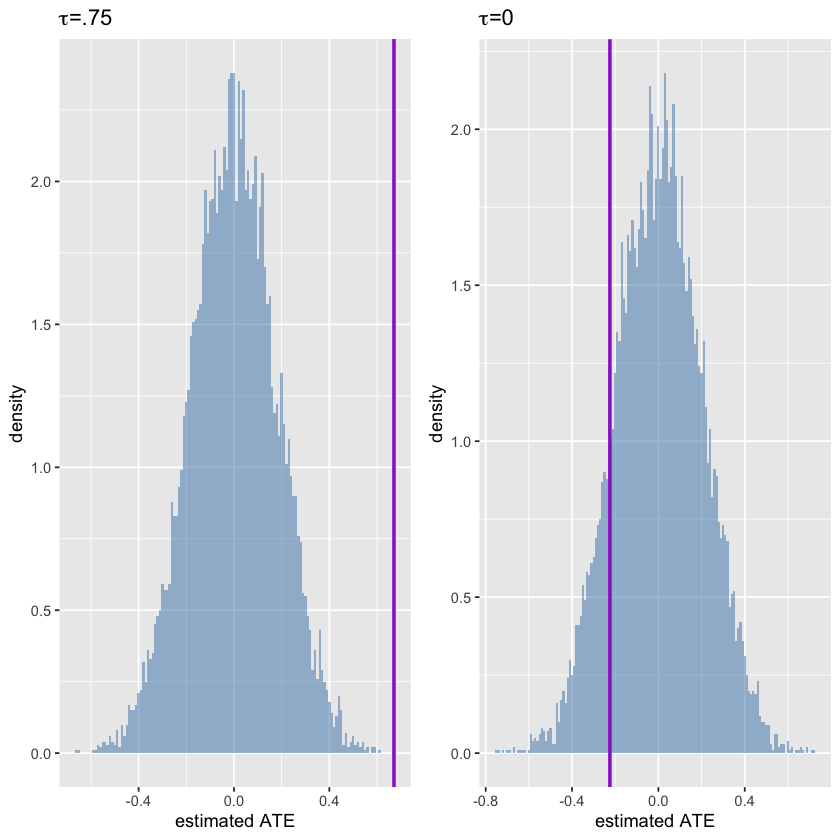

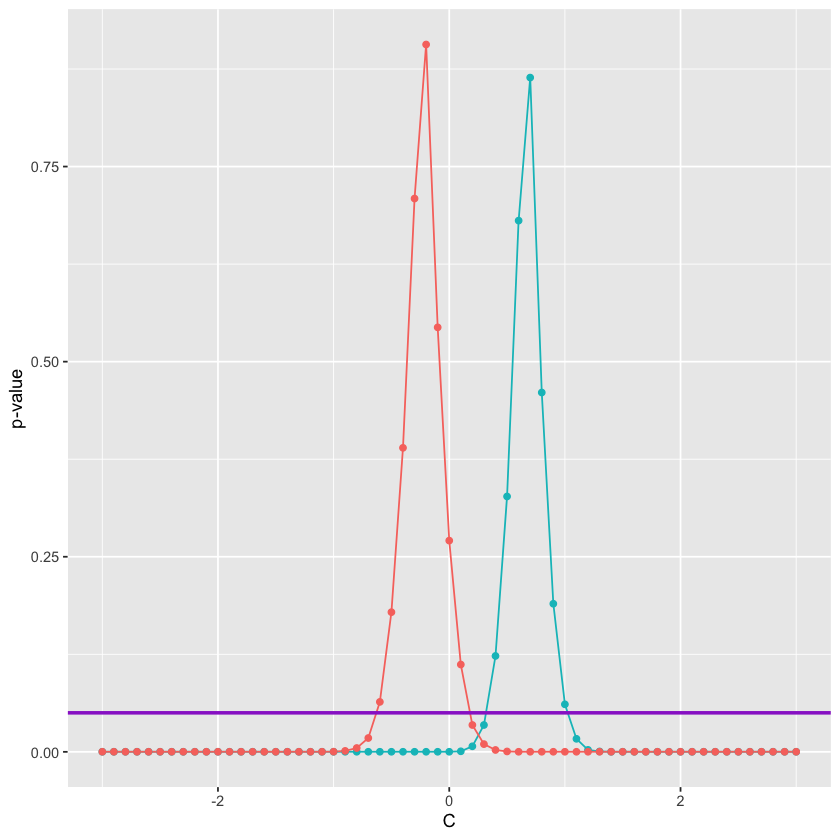

In [6]:
# Plot 1
grid.arrange(p1, p2, ncol=2)

# Plot 2
plotdata = data.frame(val1=p.vals1,val2=p.vals2,C=C.val)

ggplot(plotdata, aes(x=C.val)) + 
  geom_line(aes(y = val1, colour = "red")) +
  geom_line(aes(y = val2, colour = "blue")) +
  geom_point(aes(y = val1, colour = "red")) +
  geom_point(aes(y = val2, colour = "blue")) +
  geom_hline(yintercept = .05, colour="darkorchid3", size=1)+
  scale_x_continuous(name="C", limits=c(-3,3)) +
  scale_y_continuous(name="p-value") +
  theme(plot.title = element_text(lineheight=.8, face="bold"),legend.position="none")

Warning message:
"Removed 20 rows containing missing values (`geom_line()`)."
Warning message:
"Removed 20 rows containing missing values (`geom_line()`)."


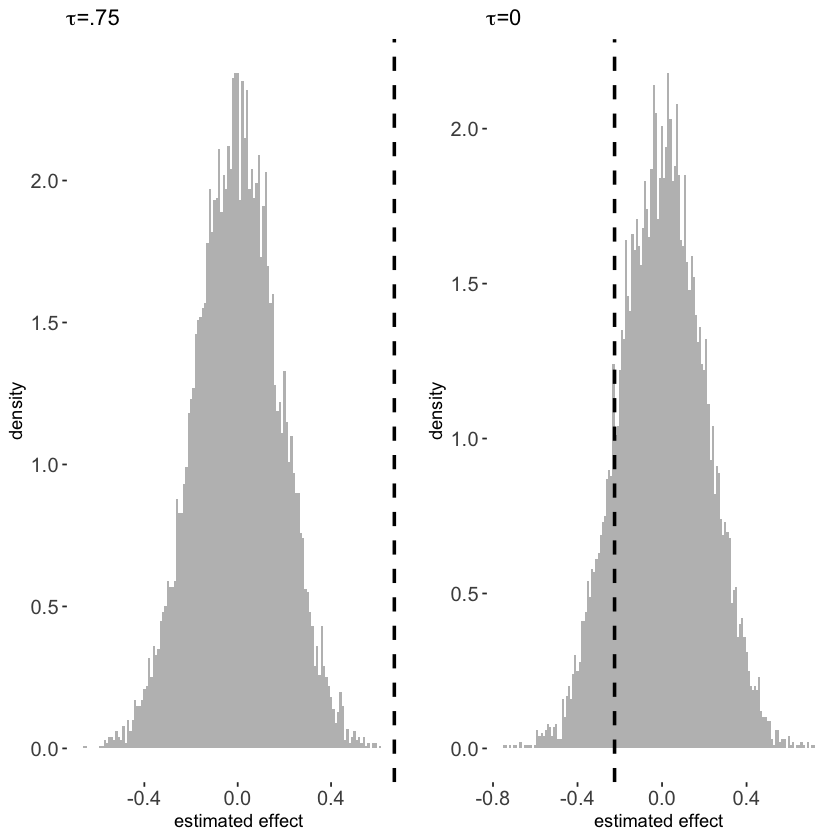

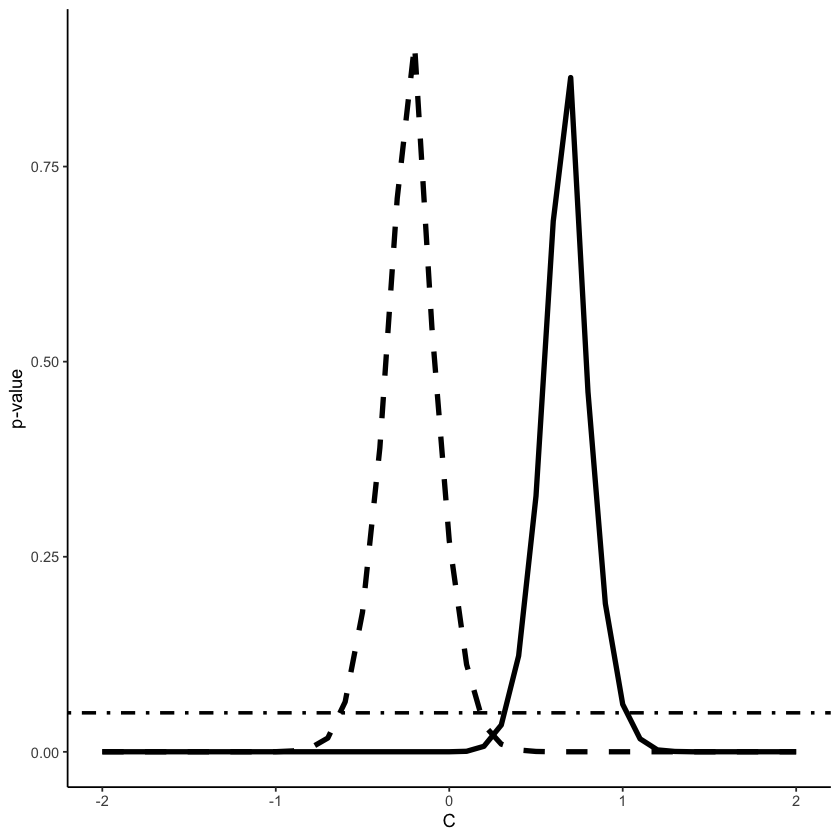

In [7]:
# FIGURES EN NOIR ET BLANC
# Plot 1
grid.arrange(p1_bw, p2_bw, ncol=2)

ggplot(plotdata, aes(x=C.val)) + 
  geom_line(aes(y = val1),  colour = "black", linetype = "solid", linewidth=1.5) +
  geom_line(aes(y = val2),  colour ="black", linetype = "dashed", linewidth=1.5) +
  geom_hline(yintercept = .05, colour="black", size=1, linetype = "dotdash")+
  scale_x_continuous(name="C", limits=c(-2,2)) +
  scale_y_continuous(name="p-value") +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
        panel.background = element_blank(), axis.line = element_line(colour = "black"), plot.title = element_text(lineheight=.8, face="bold"),legend.position="none")


In [8]:
# SAUVEGARDE FIGURES

# Plot 1
jpeg("FisherTest.jpg", width = 1000, height = 500)
grid.arrange(p1_bw, p2_bw, ncol=2)
dev.off()

# Plot 2
plotdata = data.frame(val1=p.vals1,val2=p.vals2,C=C.val)

jpeg("p-val.jpg", width = 500, height = 500)
ggplot(plotdata, aes(x=C.val)) + 
  geom_line(aes(y = val1),  colour = "black", linetype = "solid", linewidth=1.5) +
  geom_line(aes(y = val2),  colour ="black", linetype = "dashed", linewidth=1.5) +
  geom_hline(yintercept = .05, colour="black", size=1, linetype = "dotdash")+
  scale_x_continuous(name="C", limits=c(-2,2)) +
  scale_y_continuous(name="p-value") +
  theme(
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.background = element_blank(),
    plot.title = element_text(lineheight=.8, face="bold"),
    legend.position="none",
    axis.text=element_text(size=12)
    )
dev.off()

pdf 
  2

Warning message:
"Removed 20 rows containing missing values (`geom_line()`)."
Warning message:
"Removed 20 rows containing missing values (`geom_line()`)."


pdf 
  2